In [1]:
# Call the relevant python packages
import numpy as np
import pandas as pd
import glob, os                          # Operating system module and pathnames

import matplotlib
#matplotlib.use('nbagg')
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.io import ascii, fits
from astropy.table import join, hstack, Table, Column, vstack
from astropy.coordinates import Angle, Latitude, Longitude, SkyCoord


# Set colour palette & plot layouts
import seaborn as sns     #; sns.set()
sns.set_context("paper")   # "paper", "notebook", "talk", "poster"

# Output plots in Notebook
#%matplotlib notebook
%matplotlib inline  

In [2]:
# Read in the catalogue

file = 'NGC6822_Spitzer_JHK.csv'
data = ascii.read(file, data_start=1)

In [3]:
data.colnames

['ID',
 'RA',
 'Dec',
 'k36mag',
 'e36mag',
 'd36mag',
 'k45mag',
 'e45mag',
 'd45mag',
 'k58mag',
 'e58mag',
 'd58mag',
 'k80mag',
 'e80mag',
 'd80mag',
 'k24mag',
 'e24mag',
 'dstArcSec',
 'RAJ2000',
 'DEJ2000',
 'Jmag',
 'eJmag',
 'Hmag',
 'eHmag',
 'Kmag',
 'eKmag']

Note null values in the IRAC and MIPS data are given as -9999.0

Nulll values in the JHK section are given as null 

You probably want to make these consistent with each other to make life easier later on


In [4]:
# If want to examie the cataloge in browser
data.show_in_browser(jsviewer=True)


In [5]:
# Select sources that have MIPS [24] data & Also mask out sources with large errors ie >0.2
MIPS24_idx = ((data['k24mag'] > 0) & (data['e24mag'] < 0.2) & (data['e24mag'] > 0.0)) 
MIPS24_cat = data[MIPS24_idx]

CMD36_idx = ((data['k36mag'] > 0) & (data['e36mag'] < 0.2) & (data['e36mag'] > 0.0)) 
CMD36_cat = data[CMD36_idx]

CMD45_idx = ((data['k45mag'] > 0) & (data['e45mag'] < 0.2) & (data['e45mag'] > 0.0)) 
CMD45_cat = data[CMD45_idx]

CMD58_idx = ((data['k58mag'] > 0) & (data['e58mag'] < 0.2) & (data['e58mag'] > 0.0)) 
CMD58_cat = data[CMD58_idx]

CMD80_idx = ((data['k80mag'] > 0) & (data['e80mag'] < 0.2) & (data['e80mag'] > 0.0)) 
CMD80_cat = data[CMD80_idx]

CCDH_idx = ((data['Hmag'] > 0) & (data['eHmag'] < 0.2) & (data['eHmag'] > 0.0)) 
CCDH_cat = data[CCDH_idx]

CCDJ_idx = ((data['Jmag'] > 0) & (data['eJmag'] < 0.2) & (data['eJmag'] > 0.0)) 
CCDJ_cat = data[CCDJ_idx]

CCDK_idx = ((data['Kmag'] > 0) & (data['eKmag'] < 0.2) & (data['eKmag'] > 0.0)) 
CCDK_cat = data[CCDK_idx]

In [6]:
# Example doing a colour cut  - np.where() is excelent for this it returns the index which makes this criteria
idx_ysoish_3658 = np.where((data['k36mag']-data['k58mag'] > 2.7) & (data['k36mag'] < 19.))
# print the number selected
print("Number of stars in cut 3658: {}".format(len(idx_ysoish_3658[0])))

idx_ysoish_4558 = np.where((data['k45mag']-data['k58mag'] > 2.7) & (data['k45mag'] < 19.))
print("Number of stars in cut 4558: {}".format(len(idx_ysoish_4558[0])))

idx_ysoish_4580 = np.where((data['k45mag']-data['k80mag'] > 2.7) & (data['k80mag'] < 15.))
print("Number of stars in cut 4580: {}".format(len(idx_ysoish_4580[0])))

idx_ysoish_4524 = np.where((data['k45mag']-data['k24mag'] > 2.7) & (data['k45mag'] < 15.))
print("Number of stars in cut 4524: {}".format(len(idx_ysoish_4524[0])))

idx_ysoish_8024 = np.where((data['k80mag']-data['k24mag'] > 2.7) & (data['k80mag'] < 15.))
print("Number of stars in cut 8024: {}".format(len(idx_ysoish_8024[0])))

idx_ysoish_3645= np.where((data['k36mag']-data['k45mag'] > 1.7) & (data['k36mag'] < 25.))
print("Number of stars in cut 3645: {}".format(len(idx_ysoish_3645[0])))

idx_ysoish_HKK45= np.where((data['Hmag']-data['Kmag'] > 1.7) & (data['Kmag']-data['k45mag'] < 25.))
print("Number of stars in cut HKK45: {}".format(len(idx_ysoish_HKK45[0])))

idx_ysoish_JKJ45= np.where((data['Jmag']-data['Kmag'] > 1.7) & (data['Jmag']-data['k45mag'] < 25.))
print("Number of stars in cut JKJ45: {}".format(len(idx_ysoish_JKJ45[0])))

idx_ysoish_JHH45= np.where((data['Jmag']-data['Hmag'] > 1.7) & (data['Hmag']-data['k45mag'] < 25.))
print("Number of stars in cut JHH45: {}".format(len(idx_ysoish_JHH45[0])))

idx_ysoish_36455880= np.where((data['k36mag']-data['k45mag'] > 1.7) & (data['k58mag']-data['k80mag'] < 25.))
print("Number of stars in cut 36455880: {}".format(len(idx_ysoish_36455880[0])))

idx_ysoish_K363645= np.where((data['Kmag']-data['k36mag'] > 1.7) & (data['k36mag']-data['k45mag'] < 25.))
print("Number of stars in cut K363645: {}".format(len(idx_ysoish_K363645[0])))

Number of stars in cut 3658: 75
Number of stars in cut 4558: 62
Number of stars in cut 4580: 414
Number of stars in cut 4524: 305
Number of stars in cut 8024: 991
Number of stars in cut 3645: 2
Number of stars in cut HKK45: 428
Number of stars in cut JKJ45: 665
Number of stars in cut JHH45: 143
Number of stars in cut 36455880: 2
Number of stars in cut K363645: 29


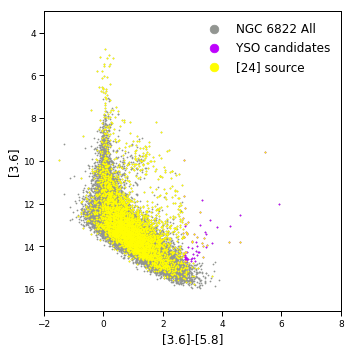

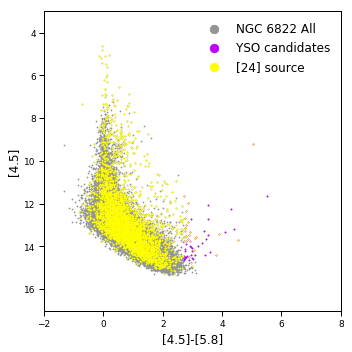

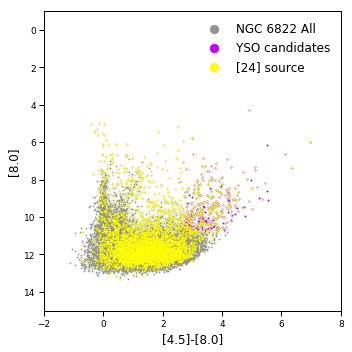

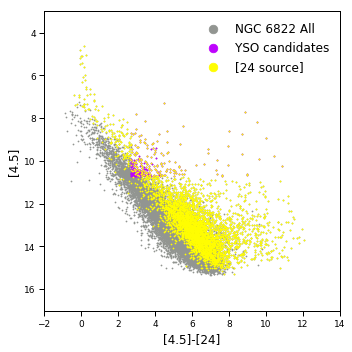

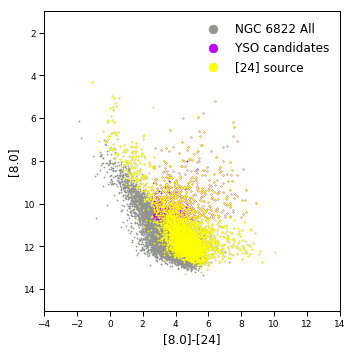

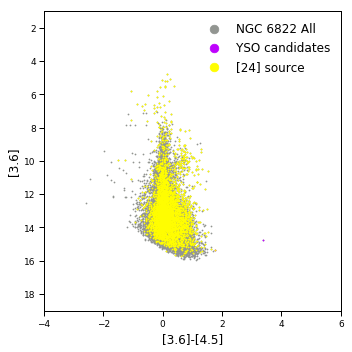

In [31]:
#3658
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k36mag']-data['k58mag'], data['k36mag']-4.29, s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k36mag'][idx_ysoish_3658]-data['k58mag'][idx_ysoish_3658], data['k36mag'][idx_ysoish_3658]-4.29, s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
plt.scatter(data['k36mag'][MIPS24_idx]-data['k58mag'][MIPS24_idx], data['k36mag'][MIPS24_idx]-4.29, s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] source")

# Set limits if automatic values dont work well
plt.xlim(-2,8)      # Set the x-axis limits
plt.ylim(17,3)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[3.6]-[5.8]", fontsize=12)
plt.ylabel("[3.6]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()








# 4558
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k45mag']-data['k58mag'], data['k45mag']-4.29, s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k45mag'][idx_ysoish_4558]-data['k58mag'][idx_ysoish_4558], data['k45mag'][idx_ysoish_4558]-4.29, s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
plt.scatter(data['k45mag'][MIPS24_idx]-data['k58mag'][MIPS24_idx], data['k45mag'][MIPS24_idx]-4.29, s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] source")

# Set limits if automatic values dont work well
plt.xlim(-2,8)      # Set the x-axis limits
plt.ylim(17,3)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[4.5]-[5.8]", fontsize=12)
plt.ylabel("[4.5]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()






# 4580
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k45mag']-data['k80mag'], data['k80mag']-4.29, s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k45mag'][idx_ysoish_4580]-data['k80mag'][idx_ysoish_4580], data['k80mag'][idx_ysoish_4580]-4.29, s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
plt.scatter(data['k45mag'][MIPS24_idx]-data['k80mag'][MIPS24_idx], data['k80mag'][MIPS24_idx]-4.29, s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] source")

# Set limits if automatic values dont work well
plt.xlim(-2,8)      # Set the x-axis limits
plt.ylim(15,-1)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[4.5]-[8.0]", fontsize=12)
plt.ylabel("[8.0]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()








# 4524
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k45mag']-data['k24mag'], data['k45mag']-4.29, s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k45mag'][idx_ysoish_4524]-data['k24mag'][idx_ysoish_4524], data['k45mag'][idx_ysoish_4524]-4.29, s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
plt.scatter(data['k45mag'][MIPS24_idx]-data['k24mag'][MIPS24_idx], data['k45mag'][MIPS24_idx]-4.29, s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24 source]")

# Set limits if automatic values dont work well
plt.xlim(-2,14)      # Set the x-axis limits
plt.ylim(17,3)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[4.5]-[24]", fontsize=12)
plt.ylabel("[4.5]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()






# 8024
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k80mag']-data['k24mag'], data['k80mag']-4.29, s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k80mag'][idx_ysoish_8024]-data['k24mag'][idx_ysoish_8024], data['k80mag'][idx_ysoish_8024]-4.29, s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
plt.scatter(data['k80mag'][MIPS24_idx]-data['k24mag'][MIPS24_idx], data['k80mag'][MIPS24_idx]-4.29, s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] source")

# Set limits if automatic values dont work well
plt.xlim(-4,14)      # Set the x-axis limits
plt.ylim(15,1)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[8.0]-[24]", fontsize=12)
plt.ylabel("[8.0]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()






# 3645
# Setting up plotting sizes
plt.rc('font', family='sans-serif')
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=12)
# plt.rcdefaults() # Resets the parameters to their default values

# Setting up figure
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()  # Sets up active plot region

# Plot everything
plt.scatter(data['k36mag']-data['k45mag'], data['k36mag']-4.29, s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

# Plot only stars which satify the example cut criteria
plt.scatter(data['k36mag'][idx_ysoish_3645]-data['k45mag'][idx_ysoish_3645], data['k36mag'][idx_ysoish_3645]-4.29, s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
plt.scatter(data['k36mag'][MIPS24_idx]-data['k45mag'][MIPS24_idx], data['k36mag'][MIPS24_idx]-4.29, s=0.9,color=sns.xkcd_rgb['bright yellow'], label="[24] source")

# Set limits if automatic values dont work well
plt.xlim(-4,6)      # Set the x-axis limits
plt.ylim(19,1)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

# Set the axis lables
plt.xlabel("[3.6]-[4.5]", fontsize=12)
plt.ylabel("[3.6]", fontsize=12)

# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

fig.tight_layout()
#plt.savefig("bla.pdf", bbox_inches='tight')
plt.show()
plt.close()

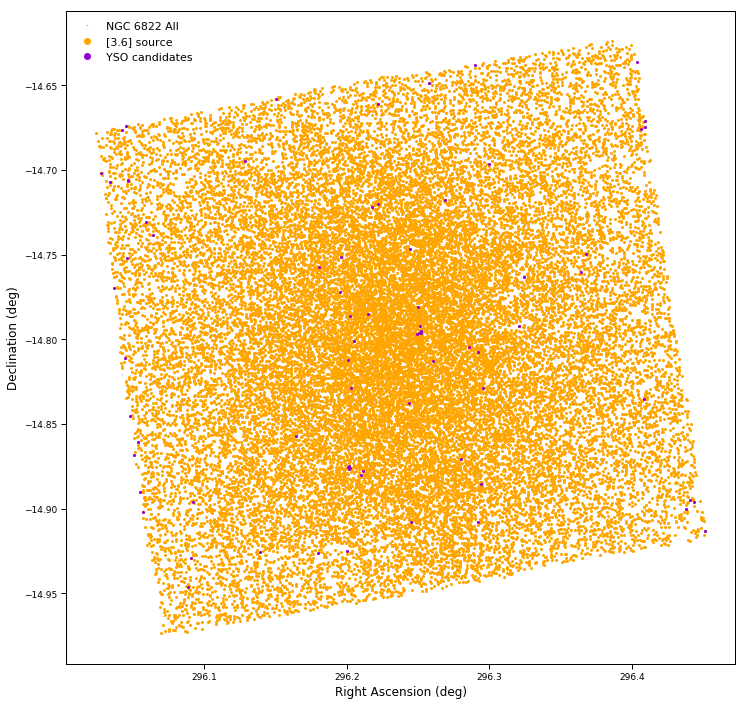

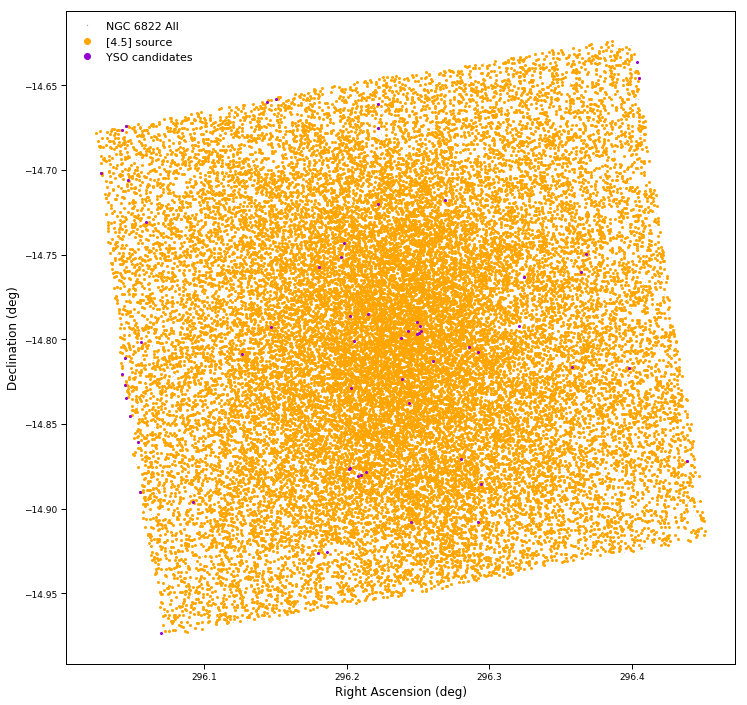

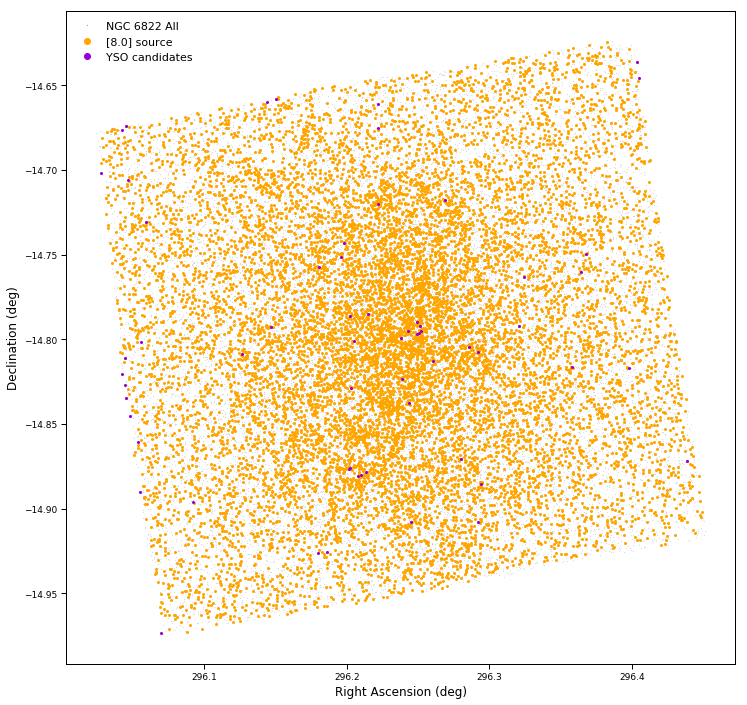

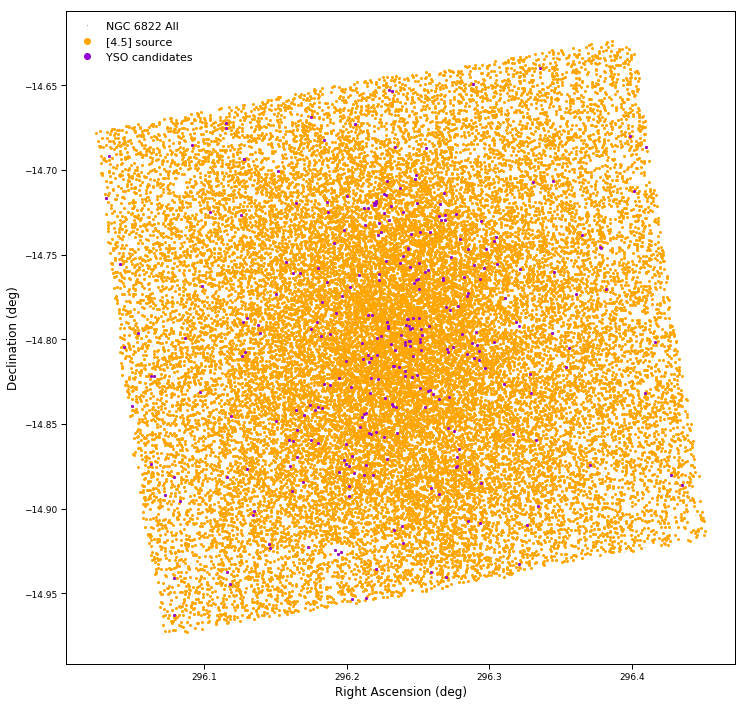

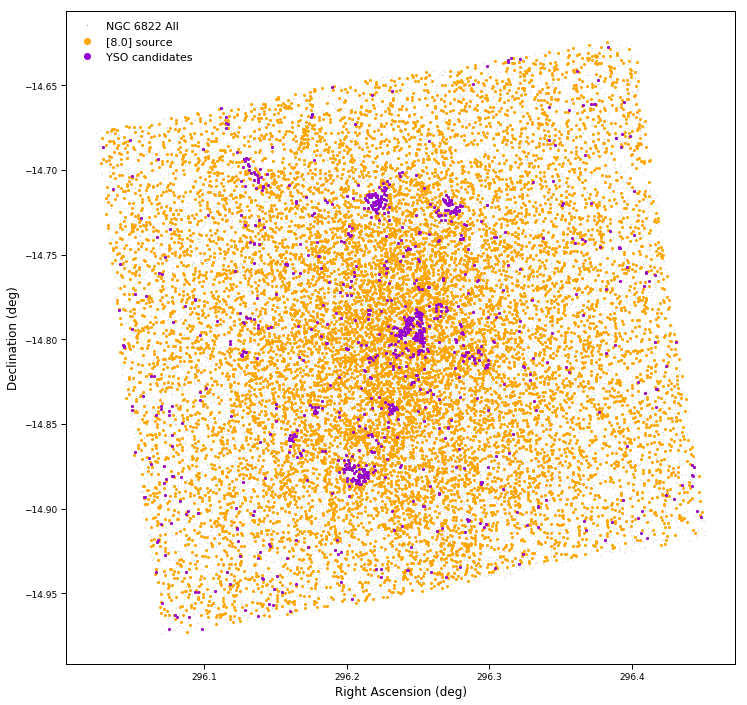

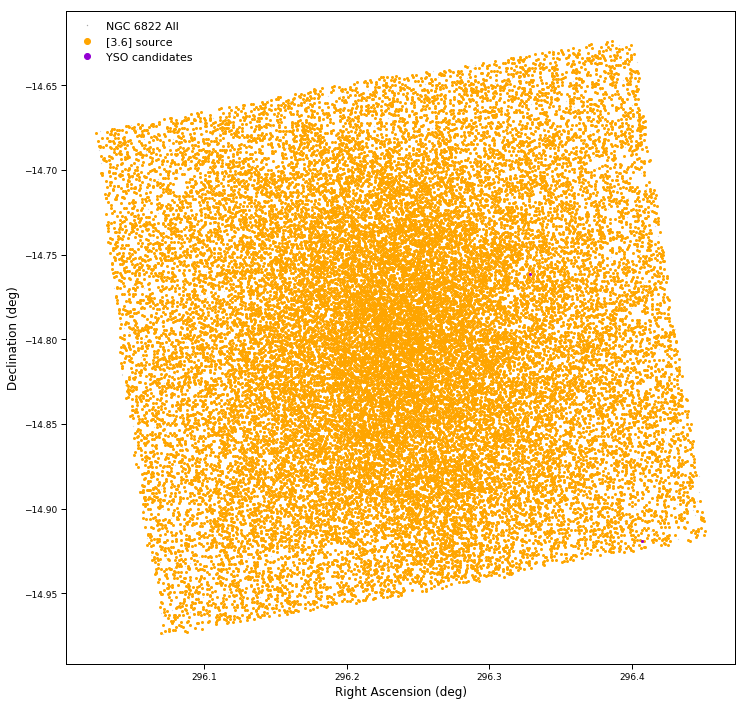

In [16]:
# 3658
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [3.6] data
plt.plot(data['RA'][CMD36_idx], data['Dec'][CMD36_idx], '.', color='orange', ms=4, label="[3.6] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][idx_ysoish_3658], data['Dec'][idx_ysoish_3658], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()






# 4558
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [4.5] data
plt.plot(data['RA'][CMD45_idx], data['Dec'][CMD45_idx], '.', color='orange', ms=4, label="[4.5] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][idx_ysoish_4558], data['Dec'][idx_ysoish_4558], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()







# 4580
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [8.0] data
plt.plot(data['RA'][CMD80_idx], data['Dec'][CMD80_idx], '.', color='orange', ms=4, label="[8.0] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][idx_ysoish_4558], data['Dec'][idx_ysoish_4558], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()







# 4524
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [8.0] data
plt.plot(data['RA'][CMD45_idx], data['Dec'][CMD45_idx], '.', color='orange', ms=4, label="[4.5] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][idx_ysoish_4524], data['Dec'][idx_ysoish_4524], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()







# 8024
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [8.0] data
plt.plot(data['RA'][CMD80_idx], data['Dec'][CMD80_idx], '.', color='orange', ms=4, label="[8.0] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][idx_ysoish_8024], data['Dec'][idx_ysoish_8024], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()





# 3645
# Plot the cataloge data on the sky
# Setting up plotting sizes
# plt.rc("text",  usetex=True)         # Allows latex commands
plt.rc('font', family='sans-serif')
plt.rc("xtick", labelsize=9)
plt.rc("ytick", labelsize=9)
plt.rc("axes", labelsize=9)
plt.rc("legend", fontsize=11)
# plt.rcdefaults()                    # Resets the parameters to their default values

# Setting up figure
plt.figure(figsize=(12,12))
ax = plt.gca()                        # Sets up active plot region

# Make the actuall plot
plt.plot(data['RA'], data['Dec'], '.', color='grey', ms=0.2, label="NGC 6822 All")

# Over plot sources with [3.6] data
plt.plot(data['RA'][CMD36_idx], data['Dec'][CMD36_idx], '.', color='orange', ms=4, label="[3.6] source")

#Over plot sources which make the colour cut criteria
plt.plot(data['RA'][idx_ysoish_3645], data['Dec'][idx_ysoish_3645], '.', color='darkviolet', ms=4, label="YSO candidates")

plt.xlabel('Right Ascension (deg)', size=12)
plt.ylabel('Declination (deg)', size=12)

# Add a legend
plt.legend(loc="upper left",frameon=False, scatterpoints=1, numpoints=1, markerscale=3.)

#plt.savefig("bla.pdf", bbox_inches='tight')    # Saves the figure is uncommented
plt.show()
plt.close()

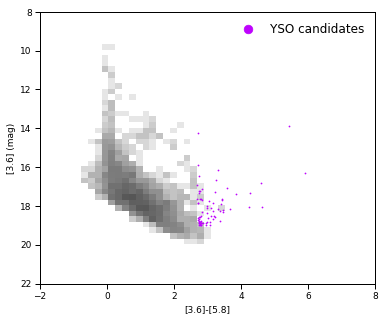

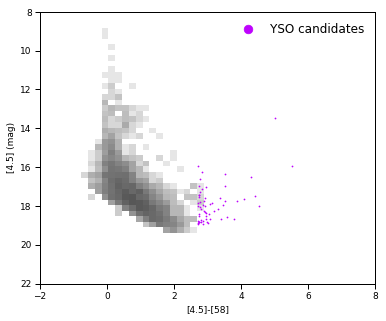

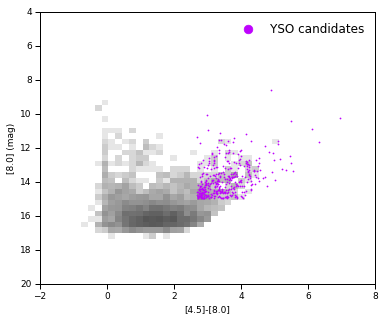

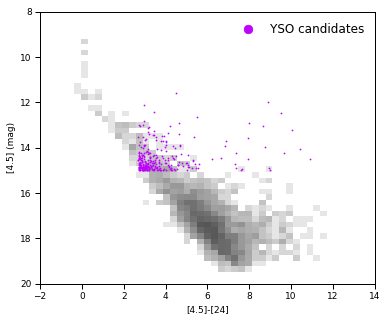

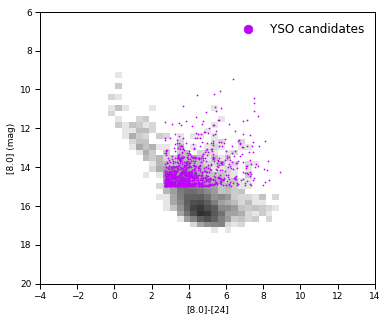

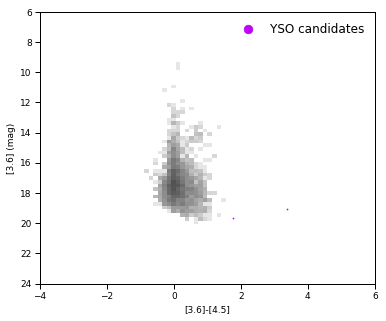

In [36]:
# Hess diagrams



#3658
#Defining the magnitude and color
color = MIPS24_cat['k36mag']-MIPS24_cat['k58mag'] 
mag2= MIPS24_cat['k36mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 50) #(min, max, nbins)
magedges = np.linspace(8, 22, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[22,8],
         xlabel='[3.6]-[5.8]',
         ylabel='[3.6] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k36mag'][idx_ysoish_3658]-data['k58mag'][idx_ysoish_3658], data['k36mag'][idx_ysoish_3658], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)


#4558
#Defining the magnitude and color
color = MIPS24_cat['k45mag']-MIPS24_cat['k58mag'] 
mag2= MIPS24_cat['k45mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 50) #(min, max, nbins)
magedges = np.linspace(8, 22, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[22,8],
         xlabel='[4.5]-[58]',
         ylabel='[4.5] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k45mag'][idx_ysoish_4558]-data['k58mag'][idx_ysoish_4558], data['k45mag'][idx_ysoish_4558], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)



#4580
#Defining the magnitude and color
color = MIPS24_cat['k45mag']-MIPS24_cat['k80mag'] 
mag2= MIPS24_cat['k80mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 8, 50) #(min, max, nbins)
magedges = np.linspace(4, 20, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,8],
         ylim=[20,4],
         xlabel='[4.5]-[8.0]',
         ylabel='[8.0] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k45mag'][idx_ysoish_4580]-data['k80mag'][idx_ysoish_4580], data['k80mag'][idx_ysoish_4580], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)



#4524
#Defining the magnitude and color
color = MIPS24_cat['k45mag']-MIPS24_cat['k24mag'] 
mag2= MIPS24_cat['k45mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-2.0, 14, 50) #(min, max, nbins)
magedges = np.linspace(8, 20, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-2,14],
         ylim=[20,8],
         xlabel='[4.5]-[24]',
         ylabel='[4.5] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k45mag'][idx_ysoish_4524]-data['k24mag'][idx_ysoish_4524], data['k45mag'][idx_ysoish_4524], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)


#8024
#Defining the magnitude and color
color = MIPS24_cat['k80mag']-MIPS24_cat['k24mag'] 
mag2= MIPS24_cat['k80mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-4, 14, 50) #(min, max, nbins)
magedges = np.linspace(6, 20, 50)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-4,14],
         ylim=[20,6],
         xlabel='[8.0]-[24]',
         ylabel='[8.0] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k80mag'][idx_ysoish_8024]-data['k24mag'][idx_ysoish_8024], data['k80mag'][idx_ysoish_8024], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)



#3645
#Defining the magnitude and color
color = MIPS24_cat['k36mag']-MIPS24_cat['k45mag'] 
mag2= MIPS24_cat['k36mag']

#Defining the edges of the 2D histogram for the Hess diagram  - makesure this matches your plot imits or is just smaller than
coledges = np.linspace(-4.0, 6, 75) #(min, max, nbins)
magedges = np.linspace(6, 24, 75)
extent = [coledges[0], coledges[-1], magedges[-1], magedges[0]]

#2D histogram
numH = np.histogram2d(mag2,color,bins=(magedges, coledges))
numH[0][numH[0] == 0] = np.nan
numH=np.log10(numH[0])*0.5          #logging it to show features, but you can use any stretch you like.

#Setting up figure, 6"x5" in this case
fig = plt.figure(figsize=(6,5))

plt.clf()      #clears plot area
ax = plt.gca() #sets up active plot region

#Set up plot window: limits, titles, etc. Note the "ax" that was defined earlier.
plt.setp(ax,xlim=[-4,6],
         ylim=[24,6],
         xlabel='[3.6]-[4.5]',
         ylabel='[3.6] (mag)')


#Show the image (the 2D histogram)
im = ax.imshow(numH,extent=extent,interpolation='nearest',
            vmin=0,vmax=1000,aspect='auto')

im.set_clim(0,1.5)         #clipping values of the image to show.
im.set_cmap('gist_yarg')   #choosing a color map
plt.scatter(data['k36mag'][idx_ysoish_3645]-data['k45mag'][idx_ysoish_3645], data['k36mag'][idx_ysoish_3645], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
# Add a legend
plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

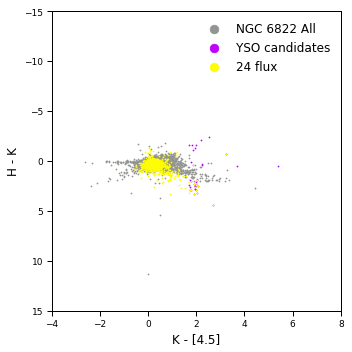

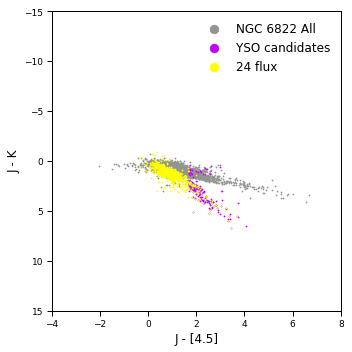

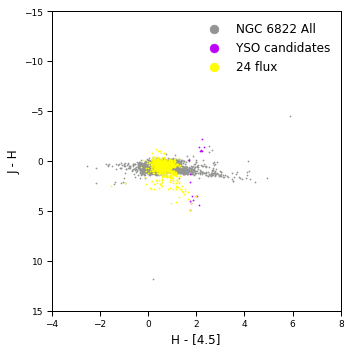

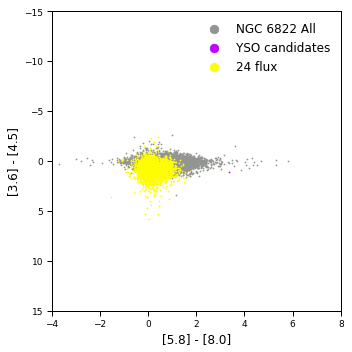

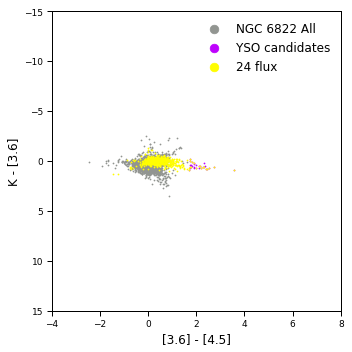

In [27]:
#CCDs


def ccd(A,B,C,D,idx,a,b,c,d):
    # Setting up plotting sizes
    plt.rc('font', family='sans-serif')
    # plt.rc("text",  usetex=True)         # Allows latex commands
    plt.rc("xtick", labelsize=9)
    plt.rc("ytick", labelsize=9)
    plt.rc("axes", labelsize=9)
    plt.rc("legend", fontsize=12)
    # plt.rcdefaults() # Resets the parameters to their default values

    # Setting up figure
    fig = plt.figure(figsize=(5, 5))
    ax = plt.gca()  # Sets up active plot region

    # Plot everything
    plt.scatter(data[C]-data[D], data[A]-data[B], s=0.9,color=sns.xkcd_rgb['grey'], label="NGC 6822 All")

    # Plot only stars which satify the example cut criteria
    plt.scatter(data[A][idx]-data[B][idx], data[C][idx]-data[D][idx], s=0.9,color=sns.xkcd_rgb['bright purple'], label="YSO candidates")
    plt.scatter(data[A][MIPS24_idx]-data[B][MIPS24_idx], data[C][MIPS24_idx]-data[D][MIPS24_idx], s=0.9,color=sns.xkcd_rgb['bright yellow'], label="24 flux")

    # Set limits if automatic values dont work well
    plt.xlim(-4,8)      # Set the x-axis limits
    plt.ylim(15,-15)           # Set the y-axis limits NB Smaller numbers are bighter in magnitudes so flip max/min values

    # Set the axis lables
    x_label = c+' - '+d
    y_label = a+' - '+b
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)

    # Add a legend
    plt.legend(loc="upper right",frameon=False, scatterpoints=1, numpoints=1, markerscale=9.)

    fig.tight_layout()
    #plt.savefig("bla.pdf", bbox_inches='tight')
    plt.show()
    plt.close()
    
    
ccd('Hmag','Kmag','Kmag','k45mag',idx_ysoish_HKK45,'H','K','K','[4.5]')
ccd('Jmag','Kmag','Jmag','k45mag',idx_ysoish_JKJ45,'J','K','J','[4.5]')
ccd('Jmag','Hmag','Hmag','k45mag',idx_ysoish_JHH45,'J','H','H','[4.5]')
ccd('k36mag','k45mag','k58mag','k80mag',idx_ysoish_36455880,'[3.6]','[4.5]','[5.8]','[8.0]')
ccd('Kmag','k36mag','k36mag','k45mag',idx_ysoish_K363645,'K','[3.6]','[3.6]','[4.5]')